# CREDIT CARD FRAUD DETECTION
In this notebook, I have used the __Credit Card Transactions__ dataset to create a machine learning model for the detection of _credit card fraud_ using Data Science techniques.
## 1. Importing Important Libraries

In [132]:
import warnings
warnings.filterwarnings('ignore')

#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading and Exploring the dataset

In [133]:
# importing dataset
credit_data=pd.read_csv('./creditcard.csv')

In [134]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [135]:
#Interpreting data description
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [136]:
#checking the information about the columns of dataset
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [137]:
# For checking any duplicated data of customers
len(credit_data)-len(credit_data.drop_duplicates())

1081

In [138]:
credit_data=credit_data.drop_duplicates()

In [139]:
credit_data.shape

(283726, 31)

After executing the above functions it is clear that we have 284807 records and 31 columns. Also the data is not having any null values which saves our time of imputing values. Then I checked for the duplicated values which are 1081. So I dropped them.

## 3. Exploratory Data Analysis
In this section, we'll explore the data using multiple functions and graphs.

<Axes: xlabel='Class', ylabel='count'>

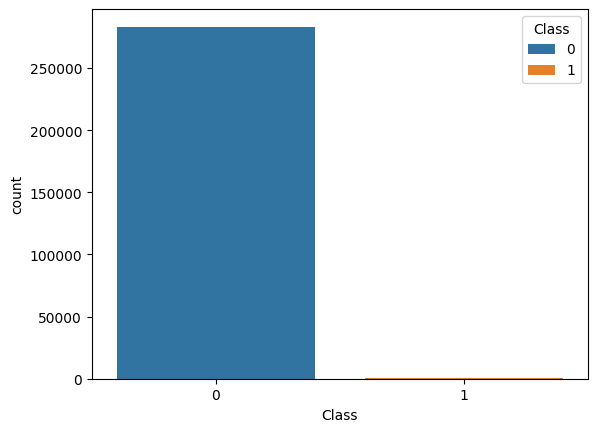

In [140]:
#Using bar graph to see the valid and fraudulent transactions
sns.countplot(x=credit_data['Class'],hue=credit_data['Class'])

As 0=Valid and 1=Fraud transaction. It is very clear that in the __Class__ column the number of fraud transactions are very low.

In [141]:
# Counting the number of valid and fraudelent transactions
count_classes= pd.value_counts(credit_data['Class'],sort=True)

In [142]:
count_classes

Class
0    283253
1       473
Name: count, dtype: int64

In [143]:
# Checking the percentage of fraud & valid transactions in dataset 
print((283253/283726)*100)
print((473/283726)*100)

99.83328986416473
0.1667101358352777


It is very clear that approx all the data comprises of valid transactions. Considering this we must either balance the dataset or we should train our model with such statistical methods that works well with imbalanced data. In this notebook I'll go for the first one(balancing the dataset).

In [144]:
# Separating the valid & fraud transactions 
fraud = credit_data[credit_data['Class']==1]
valid = credit_data[credit_data['Class']==0]

In [145]:
#Checking outliers in the amount column for fraud transactions
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [146]:
#Checking outliers in the amount column for valid transactions
valid.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

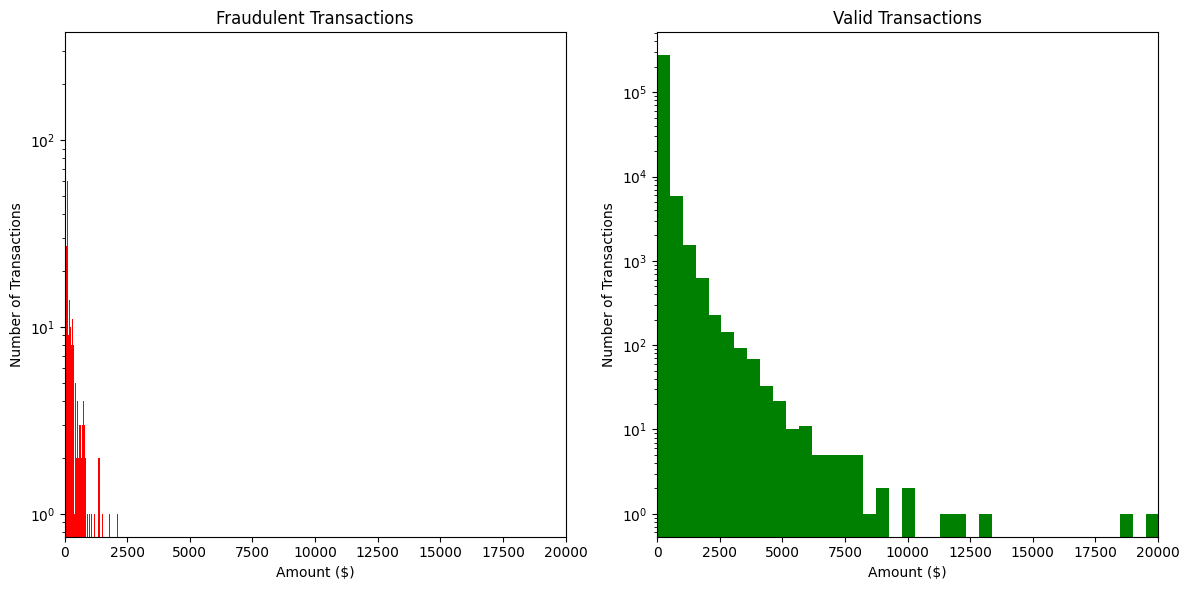

In [147]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot for Fraud Transactions
plt.subplot(121)
plt.hist(fraud.Amount, bins=50, color='red')
plt.title('Fraudulent Transactions')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')

# Plot for Valid Transactions
plt.subplot(122)
plt.hist(valid.Amount, bins=50, color='green')
plt.title('Valid Transactions')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')

plt.tight_layout() 

plt.show()

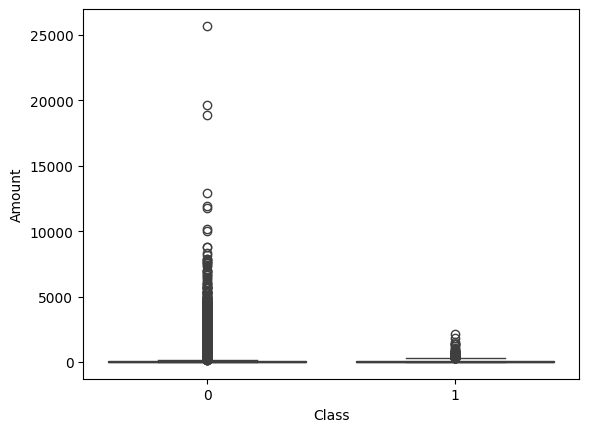

In [148]:
sns.boxplot(x="Class", y="Amount", data=credit_data)
plt.show()

From the histogram and the box plot we can see that most of our data for valid transactions lies below 10000. So the data above that can be considered as outliers.

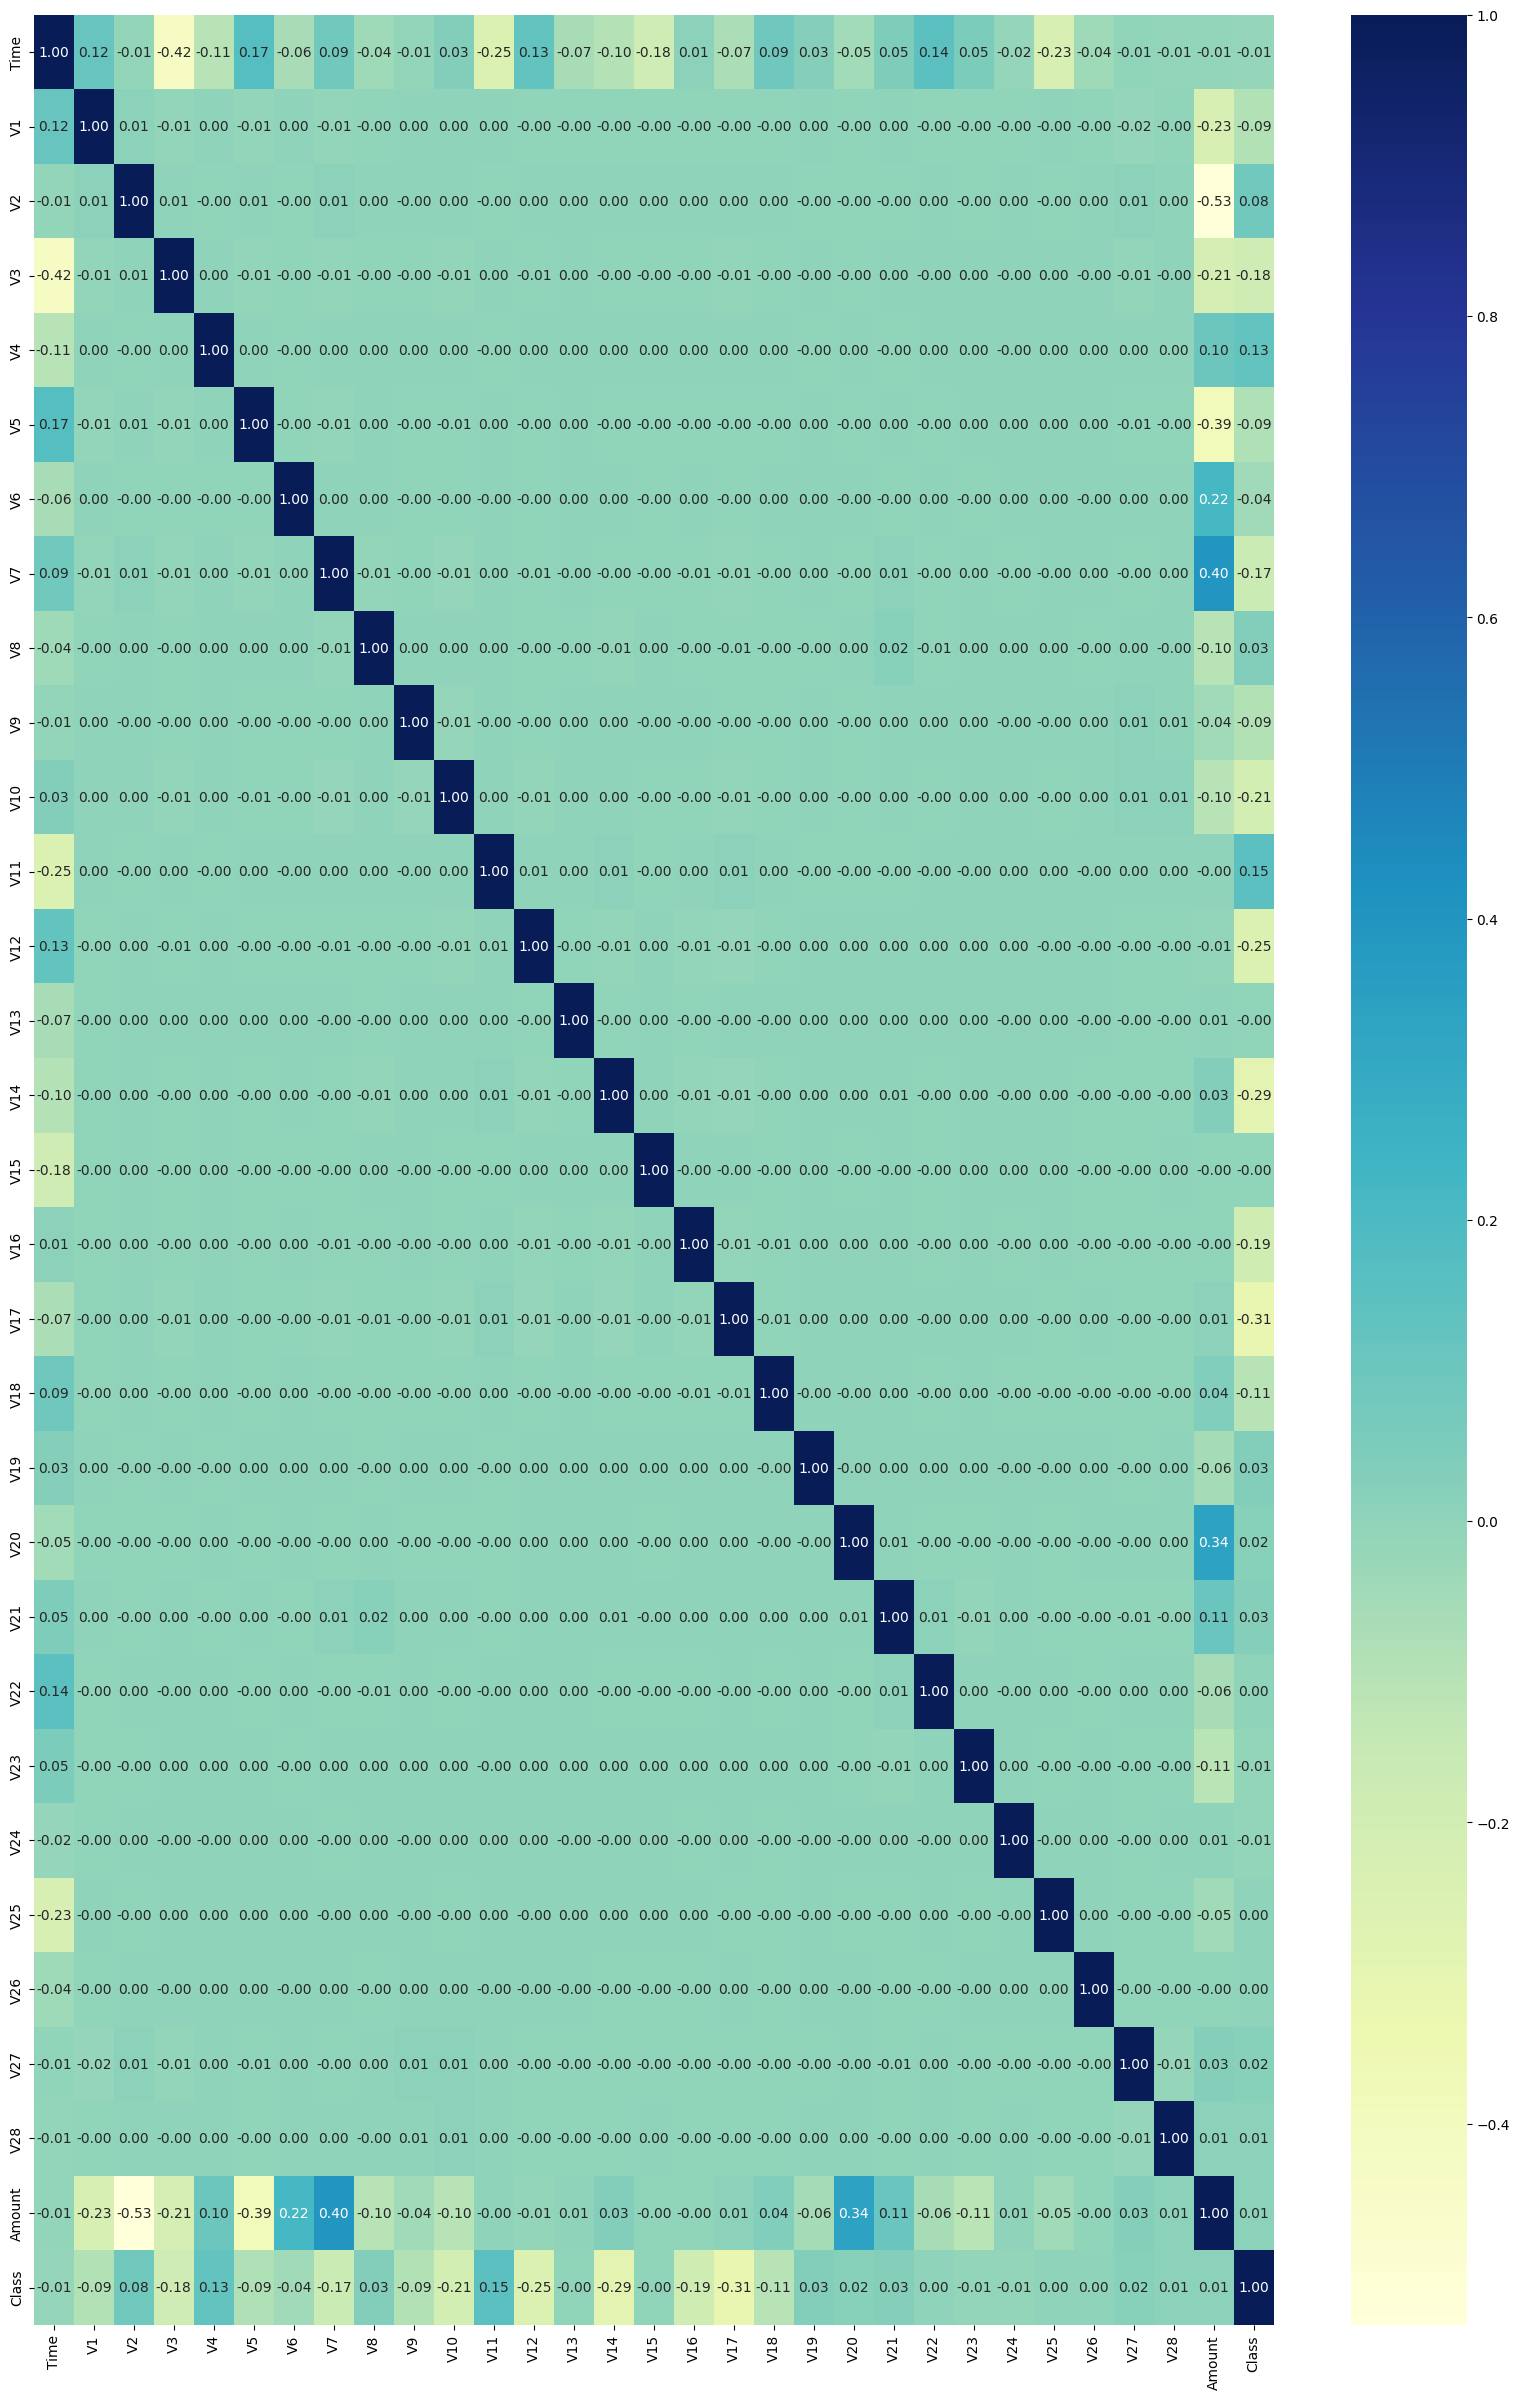

In [149]:
#displaying correlation map to see the correlation between columns of dataset
numeric_data = credit_data.select_dtypes(include=[int, float])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(20, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.show()

In the heatmap, we can see that the V13, V15, V22, V25, V26 columns have low correlation with Class column.

## 4. Cleaning Data
In this section, I've dropped the outliers and balanced the dataset by equalizing the valid and fraudulent values in the datset. Also I've dropped the V13, V15,V22,V25,V26 columns due their low correlation to the Class column.

In [150]:
# Remove rows with values greater than 100,000 in the Amount column
credit_data = credit_data[credit_data['Amount'] <= 10000]

In [151]:
credit_data.shape

(283719, 31)

In [153]:
#Equalizing the valid and fradulent transactions for having a balanced dataset.
valid_sample=valid.sample(n=473)
cred_data_new=pd.concat([valid_sample,fraud],axis=0)

In [154]:
cred_data_new['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [155]:
#dropping V13, V15, V22, V25, V26
cred_data_new = cred_data_new.drop(['V13','V15','V22','V25','V26'], axis=1)

## 5. Training and Testing the Model
Splitting the dataset into 80-20 ratio for training and testing the model. For regression, I've used the Logistic Regression and for checking accuracy I've used the accuracy_score function.

In [171]:
#splitting the dataset into 80-20 ratio for training and testing
from sklearn.model_selection import train_test_split

X = cred_data_new.drop('Class', axis=1) #Selecting the features
y = cred_data_new['Class'] #Selecting the prediction target

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2)

#Selecting the regressor and training the model
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [172]:
#prediction of credit card fraudulent and valid transactions using test data
y_predict = model.predict(X_test)
print(y_predict)

[0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1
 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1
 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0
 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0
 1 1 1 0 0]


In [173]:
#Checking model's perfomance over test data
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predict)
accuracy

0.9526315789473684

Accuracy acheived after testing the model is __95.26%__ which is pretty good.

## Author Details
_Hashir Soomro_